In [0]:
path = "dbfs:/FileStore/shared_uploads/ethaenra@ucsd.edu/GermanCredit.csv"
credit = spark.read.option('header','true').format("csv").load(path)
#The following dataset provides the data of many participants applying for a loan. it contains features such as :
#Status of their checking account
#How long the account has been around
#Historical categorization of credit details
#Pupose of the requested loan
#Amount requested
#Amount of savings
#Durration of current employment
#Installment rate
#Gender + Maritial status
#Having other loans
#Years of residence
#Has any property
#Age
#Installment plans of other Loans
#Housing status
#Number of credits
#Job description
#Number of liable people
#Has telephone
#Is a Foreign worker

#Using these features, the data has the prediction label credit-risk: which deems if the individual is viable for the reception of a loan or not

#The pupose of this project is to use the Logisitic regression model from the pyspark MLlib package to create a logistic regression model that precisely predicts the potential of an individual to recieve a loan given the above features 
credit.toPandas().head()

Out[83]:

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,... < 100 DM,6,critical account/other credits existing,domestic appliances,1169,unknown/no savings account,... >= 7 years,4,male : single,none,4,real estate,67,none,own,2,skilled employee/official,1,yes,yes,1
1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee/official,1,no,yes,0
2,no checking account,12,critical account/other credits existing,retraining,2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,3,real estate,49,none,own,1,unskilled - resident,2,no,yes,1
3,... < 100 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,guarantor,4,building society savings agreement/life insurance,45,none,for free,1,skilled employee/official,2,no,yes,1
4,... < 100 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,none,4,unknown/no property,53,none,for free,2,skilled employee/official,2,no,yes,0


In [0]:
#Data Exploration
credit.printSchema()

root
-- status: string (nullable = true)
-- duration: string (nullable = true)
-- credit_history: string (nullable = true)
-- purpose: string (nullable = true)
-- amount: string (nullable = true)
-- savings: string (nullable = true)
-- employment_duration: string (nullable = true)
-- installment_rate: string (nullable = true)
-- personal_status_sex: string (nullable = true)
-- other_debtors: string (nullable = true)
-- present_residence: string (nullable = true)
-- property: string (nullable = true)
-- age: string (nullable = true)
-- other_installment_plans: string (nullable = true)
-- housing: string (nullable = true)
-- number_credits: string (nullable = true)
-- job: string (nullable = true)
-- people_liable: string (nullable = true)
-- telephone: string (nullable = true)
-- foreign_worker: string (nullable = true)
-- credit_risk: string (nullable = true)

In [0]:
#Removing unneeded columns
credit = credit.toPandas().drop(columns = ['status'])

#Converting categorical features to type category
credit["credit_history"] = credit["credit_history"].astype("category")
credit["purpose"] = credit["purpose"].astype("category")
credit["savings"] = credit["savings"].astype("category")
credit["employment_duration"] = credit["employment_duration"].astype("category")
credit["personal_status_sex"] = credit["personal_status_sex"].astype("category")
credit["other_debtors"] = credit["other_debtors"].astype("category")
credit["present_residence"] = credit["present_residence"].astype("category")
credit["property"] = credit["property"].astype("category")
credit["other_installment_plans"] = credit["other_installment_plans"].astype("category")
credit["housing"] = credit["housing"].astype("category")
credit["job"] = credit["job"].astype("category")
credit["telephone"] = credit["telephone"].astype("category")
credit["foreign_worker"] = credit["foreign_worker"].astype("category")

In [0]:
#Use pd.getDummies to split the categorical variables
credit_fixed = credit.drop(columns = ["duration","amount","installment_rate","age", "number_credits","people_liable","credit_risk"])
credit = sqlContext.createDataFrame(credit.drop(columns = ["credit_history","purpose","savings","employment_duration","personal_status_sex", "other_debtors","present_residence","property","other_installment_plans","housing","job","telephone","foreign_worker"]))
credit_fixed = sqlContext.createDataFrame(credit_fixed)

credit_fixed.toPandas().head()


Out[86]:

,credit_history,purpose,savings,employment_duration,personal_status_sex,other_debtors,present_residence,property,other_installment_plans,housing,job,telephone,foreign_worker
0,critical account/other credits existing,domestic appliances,unknown/no savings account,... >= 7 years,male : single,none,4,real estate,none,own,skilled employee/official,yes,yes
1,existing credits paid back duly till now,domestic appliances,... < 100 DM,1 <= ... < 4 years,female : divorced/separated/married,none,2,real estate,none,own,skilled employee/official,no,yes
2,critical account/other credits existing,retraining,... < 100 DM,4 <= ... < 7 years,male : single,none,3,real estate,none,own,unskilled - resident,no,yes
3,existing credits paid back duly till now,radio/television,... < 100 DM,4 <= ... < 7 years,male : single,guarantor,4,building society savings agreement/life insurance,none,for free,skilled employee/official,no,yes
4,delay in paying off in the past,car (new),... < 100 DM,1 <= ... < 4 years,male : single,none,4,unknown/no property,none,for free,skilled employee/official,no,yes


In [0]:
from pyspark.ml.feature import OneHotEncoder
from pyspark.ml.feature import StringIndexer
from pyspark.ml import Pipeline

#One hot encoding categorical variables and Indexing the encoded values
s1 = StringIndexer().setInputCol("credit_history").setOutputCol("credit_history_index")
e1 = OneHotEncoder(dropLast=False, inputCol="credit_history_index", outputCol="credit_history_")

s2 = StringIndexer().setInputCol("purpose").setOutputCol("purpose_index")
e2 = OneHotEncoder(dropLast=False, inputCol="purpose_index", outputCol="purpose_")

s3 = StringIndexer().setInputCol("savings").setOutputCol("savings_index")
e3 = OneHotEncoder(dropLast=False, inputCol="savings_index", outputCol="savings_")

s4 = StringIndexer().setInputCol("employment_duration").setOutputCol("employment_duration_index")
e4 = OneHotEncoder(dropLast=False, inputCol="employment_duration_index", outputCol="employment_duration_")

s5 = StringIndexer().setInputCol("personal_status_sex").setOutputCol("personal_status_sex_index")
e5 = OneHotEncoder(dropLast=False, inputCol="personal_status_sex_index", outputCol="personal_status_sex_")

s6 = StringIndexer().setInputCol("other_debtors").setOutputCol("other_debtors_index")
e6 = OneHotEncoder(dropLast=False, inputCol="other_debtors_index", outputCol="other_debtors_")

s7 = StringIndexer().setInputCol("present_residence").setOutputCol("present_residence_index")
e7 = OneHotEncoder(dropLast=False, inputCol="present_residence_index", outputCol="present_residence_")

s8 = StringIndexer().setInputCol("property").setOutputCol("property_index")
e8 = OneHotEncoder(dropLast=False, inputCol="property_index", outputCol="property_")

s9 = StringIndexer().setInputCol("other_installment_plans").setOutputCol("other_installment_plans_index")
e9 = OneHotEncoder(dropLast=False, inputCol="other_installment_plans_index", outputCol="other_installment_plans_")

s10 = StringIndexer().setInputCol("housing").setOutputCol("housing_index")
e10 = OneHotEncoder(dropLast=False, inputCol="housing_index", outputCol="housing_")

s11 = StringIndexer().setInputCol("job").setOutputCol("job_index")
e11 = OneHotEncoder(dropLast=False, inputCol="job_index", outputCol="job_")

s12 = StringIndexer().setInputCol("telephone").setOutputCol("telephone_index")
e12 = OneHotEncoder(dropLast=False, inputCol="telephone_index", outputCol="telephone_")

s13 = StringIndexer().setInputCol("foreign_worker").setOutputCol("foreign_worker_index")
e13 = OneHotEncoder(dropLast=False, inputCol="foreign_worker_index", outputCol="foreign_worker_")

#Creating a pipeline with the stages of encoding and string indexing through feature engineering
credit_fixed = Pipeline(stages = [s1,e1,s2,e2,s3,e3,s4,e4,s5,e5,s6,e6,s7,e7,s8,e8,s9,e9,s10,e10,s11,e11,s12,e12,s13,e13]).fit(credit_fixed).transform(credit_fixed)

cf_show = credit_fixed.toPandas()
cf_show.head()


Out[87]:

,credit_history,purpose,savings,employment_duration,personal_status_sex,other_debtors,present_residence,property,other_installment_plans,housing,job,telephone,foreign_worker,credit_history_index,credit_history_,purpose_index,purpose_,savings_index,savings_,employment_duration_index,employment_duration_,personal_status_sex_index,personal_status_sex_,other_debtors_index,other_debtors_,present_residence_index,present_residence_,property_index,property_,other_installment_plans_index,other_installment_plans_,housing_index,housing_,job_index,job_,telephone_index,telephone_,foreign_worker_index,foreign_worker_
0,critical account/other credits existing,domestic appliances,unknown/no savings account,... >= 7 years,male : single,none,4,real estate,none,own,skilled employee/official,yes,yes,1.0,"(0.0, 1.0, 0.0, 0.0, 0.0)",0.0,"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1.0,"(0.0, 1.0, 0.0, 0.0, 0.0)",1.0,"(0.0, 1.0, 0.0, 0.0, 0.0)",0.0,"(1.0, 0.0, 0.0, 0.0)",0.0,"(1.0, 0.0, 0.0)",0.0,"(1.0, 0.0, 0.0, 0.0)",1.0,"(0.0, 1.0, 0.0, 0.0)",0.0,"(1.0, 0.0, 0.0)",0.0,"(1.0, 0.0, 0.0)",0.0,"(1.0, 0.0, 0.0, 0.0)",1.0,"(0.0, 1.0)",0.0,"(1.0, 0.0)"
1,existing credits paid back duly till now,domestic appliances,... < 100 DM,1 <= ... < 4 years,female : divorced/separated/married,none,2,real estate,none,own,skilled employee/official,no,yes,0.0,"(1.0, 0.0, 0.0, 0.0, 0.0)",0.0,"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,"(1.0, 0.0, 0.0, 0.0, 0.0)",0.0,"(1.0, 0.0, 0.0, 0.0, 0.0)",1.0,"(0.0, 1.0, 0.0, 0.0)",0.0,"(1.0, 0.0, 0.0)",1.0,"(0.0, 1.0, 0.0, 0.0)",1.0,"(0.0, 1.0, 0.0, 0.0)",0.0,"(1.0, 0.0, 0.0)",0.0,"(1.0, 0.0, 0.0)",0.0,"(1.0, 0.0, 0.0, 0.0)",0.0,"(1.0, 0.0)",0.0,"(1.0, 0.0)"
2,critical account/other credits existing,retraining,... < 100 DM,4 <= ... < 7 years,male : single,none,3,real estate,none,own,unskilled - resident,no,yes,1.0,"(0.0, 1.0, 0.0, 0.0, 0.0)",5.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...",0.0,"(1.0, 0.0, 0.0, 0.0, 0.0)",2.0,"(0.0, 0.0, 1.0, 0.0, 0.0)",0.0,"(1.0, 0.0, 0.0, 0.0)",0.0,"(1.0, 0.0, 0.0)",2.0,"(0.0, 0.0, 1.0, 0.0)",1.0,"(0.0, 1.0, 0.0, 0.0)",0.0,"(1.0, 0.0, 0.0)",0.0,"(1.0, 0.0, 0.0)",1.0,"(0.0, 1.0, 0.0, 0.0)",0.0,"(1.0, 0.0)",0.0,"(1.0, 0.0)"
3,existing credits paid back duly till now,radio/television,... < 100 DM,4 <= ... < 7 years,male : single,guarantor,4,building society savings agreement/life insurance,none,for free,skilled employee/official,no,yes,0.0,"(1.0, 0.0, 0.0, 0.0, 0.0)",2.0,"(0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,"(1.0, 0.0, 0.0, 0.0, 0.0)",2.0,"(0.0, 0.0, 1.0, 0.0, 0.0)",0.0,"(1.0, 0.0, 0.0, 0.0)",1.0,"(0.0, 1.0, 0.0)",0.0,"(1.0, 0.0, 0.0, 0.0)",2.0,"(0.0, 0.0, 1.0, 0.0)",0.0,"(1.0, 0.0, 0.0)",2.0,"(0.0, 0.0, 1.0)",0.0,"(1.0, 0.0, 0.0, 0.0)",0.0,"(1.0, 0.0)",0.0,"(1.0, 0.0)"
4,delay in paying off in the past,car (new),... < 100 DM,1 <= ... < 4 years,male : single,none,4,unknown/no property,none,for free,skilled employee/official,no,yes,2.0,"(0.0, 0.0, 1.0, 0.0, 0.0)",1.0,"(0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,"(1.0, 0.0, 0.0, 0.0, 0.0)",0.0,"(1.0, 0.0, 0.0, 0.0, 0.0)",0.0,"(1.0, 0.0, 0.0, 0.0)",0.0,"(1.0, 0.0, 0.0)",0.0,"(1.0, 0.0, 0.0, 0.0)",3.0,"(0.0, 0.0, 0.0, 1.0)",0.0,"(1.0, 0.0, 0.0)",2.0,"(0.0, 0.0, 1.0)",0.0,"(1.0, 0.0, 0.0, 0.0)",0.0,"(1.0, 0.0)",0.0,"(1.0, 0.0)"


In [0]:
#dropping old columns
credit_fixed = credit_fixed.toPandas()
credit_fixed = credit_fixed.drop(columns = ["credit_history","purpose","savings","employment_duration","personal_status_sex","other_debtors","present_residence","property","other_installment_plans","housing","job","telephone","foreign_worker"])
credit_fixed = credit_fixed.drop(columns = ["credit_history_","purpose_","savings_","employment_duration_","personal_status_sex_","other_debtors_","present_residence_","property_","other_installment_plans_","housing_","job_","telephone_","foreign_worker_"])
#creating dummy variables for all categorical features
credit_fixed = pd.get_dummies(credit_fixed,columns=["credit_history_index","purpose_index","savings_index","employment_duration_index","personal_status_sex_index","other_debtors_index","present_residence_index","property_index","other_installment_plans_index","housing_index","job_index","telephone_index","foreign_worker_index"] ,prefix_sep='_', drop_first=False)
credit_fixed.head()


Out[88]:

,credit_history_index_0.0,credit_history_index_1.0,credit_history_index_2.0,credit_history_index_3.0,credit_history_index_4.0,purpose_index_0.0,purpose_index_1.0,purpose_index_2.0,purpose_index_3.0,purpose_index_4.0,purpose_index_5.0,purpose_index_6.0,purpose_index_7.0,purpose_index_8.0,purpose_index_9.0,savings_index_0.0,savings_index_1.0,savings_index_2.0,savings_index_3.0,savings_index_4.0,employment_duration_index_0.0,employment_duration_index_1.0,employment_duration_index_2.0,employment_duration_index_3.0,employment_duration_index_4.0,personal_status_sex_index_0.0,personal_status_sex_index_1.0,personal_status_sex_index_2.0,personal_status_sex_index_3.0,other_debtors_index_0.0,other_debtors_index_1.0,other_debtors_index_2.0,present_residence_index_0.0,present_residence_index_1.0,present_residence_index_2.0,present_residence_index_3.0,property_index_0.0,property_index_1.0,property_index_2.0,property_index_3.0,other_installment_plans_index_0.0,other_installment_plans_index_1.0,other_installment_plans_index_2.0,housing_index_0.0,housing_index_1.0,housing_index_2.0,job_index_0.0,job_index_1.0,job_index_2.0,job_index_3.0,telephone_index_0.0,telephone_index_1.0,foreign_worker_index_0.0,foreign_worker_index_1.0
0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0
1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0
2,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0
3,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1,0,1,0
4,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,1,0,1,0


In [0]:
#Joining categorical and numerical features into credit_fixed df
from pyspark.sql.functions import lit
credit_fixed = sqlContext.createDataFrame(credit_fixed)
credit = credit.withColumn("Empty" , lit("12345").cast('String'))
credit_fixed = credit_fixed.withColumn("Empty", lit("12345").cast('String'))
credit_fixed = credit_fixed.join(credit, on="Empty", how="inner")
credit_fixed = credit_fixed.drop("Empty").toPandas()

from sklearn.model_selection import train_test_split
train_credit, test_credit = train_test_split(credit_fixed, test_size=0.3)

In [0]:
#converting numerical columns to float type
from pyspark.sql.types import FloatType
train_credit = sqlContext.createDataFrame(train_credit)

train_credit = train_credit.withColumn("durationFloat", train_credit["duration"].cast("double"))
train_credit = train_credit.withColumn("amountFloat", train_credit["amount"].cast("double"))
train_credit = train_credit.withColumn("installment_rateFloat", train_credit["installment_rate"].cast("double"))
train_credit = train_credit.withColumn("ageFloat", train_credit["age"].cast("double"))
train_credit = train_credit.withColumn("number_creditsFloat", train_credit["number_credits"].cast("double"))
train_credit = train_credit.withColumn("people_liableFloat", train_credit["people_liable"].cast("double"))
train_credit = train_credit.withColumn("credit_riskFloat", train_credit["credit_risk"].cast("double"))

train_credit = train_credit.drop("duration","amount","installment_rate","age","number_credits","people_liable","credit_risk")
train_credit.toPandas().head()

Out[90]:

,credit_history_index_0.0,credit_history_index_1.0,credit_history_index_2.0,credit_history_index_3.0,credit_history_index_4.0,purpose_index_0.0,purpose_index_1.0,purpose_index_2.0,purpose_index_3.0,purpose_index_4.0,purpose_index_5.0,purpose_index_6.0,purpose_index_7.0,purpose_index_8.0,purpose_index_9.0,savings_index_0.0,savings_index_1.0,savings_index_2.0,savings_index_3.0,savings_index_4.0,employment_duration_index_0.0,employment_duration_index_1.0,employment_duration_index_2.0,employment_duration_index_3.0,employment_duration_index_4.0,personal_status_sex_index_0.0,personal_status_sex_index_1.0,personal_status_sex_index_2.0,personal_status_sex_index_3.0,other_debtors_index_0.0,other_debtors_index_1.0,other_debtors_index_2.0,present_residence_index_0.0,present_residence_index_1.0,present_residence_index_2.0,present_residence_index_3.0,property_index_0.0,property_index_1.0,property_index_2.0,property_index_3.0,other_installment_plans_index_0.0,other_installment_plans_index_1.0,other_installment_plans_index_2.0,housing_index_0.0,housing_index_1.0,housing_index_2.0,job_index_0.0,job_index_1.0,job_index_2.0,job_index_3.0,telephone_index_0.0,telephone_index_1.0,foreign_worker_index_0.0,foreign_worker_index_1.0,durationFloat,amountFloat,installment_rateFloat,ageFloat,number_creditsFloat,people_liableFloat,credit_riskFloat
0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,48.0,3578.0,4.0,47.0,1.0,1.0,1.0
1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,24.0,4526.0,3.0,74.0,1.0,1.0,1.0
2,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,30.0,2503.0,4.0,41.0,2.0,1.0,1.0
3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,1,0,18.0,750.0,4.0,27.0,1.0,1.0,0.0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,1,0,1,0,24.0,1747.0,4.0,24.0,1.0,1.0,1.0


In [0]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.linalg import Vector
from pyspark.ml import Pipeline
from pyspark.ml.feature import MinMaxScaler

from pyspark.sql.functions import col

#creating Logistical regression model
lr=LogisticRegression().setRegParam(.02).setElasticNetParam(.8).setFeaturesCol("features_scaled").setLabelCol("credit_riskFloat")

#Fixing badly named columns to better work with lr model
train_credit = train_credit.withColumnRenamed('credit_history_index_0.0',  'credit_history_index_0')
train_credit = train_credit.withColumnRenamed('credit_history_index_1.0',  'credit_history_index_1')
train_credit = train_credit.withColumnRenamed("credit_history_index_2.0", "credit_history_index_2")
train_credit = train_credit.withColumnRenamed("credit_history_index_3.0", "credit_history_index_3")
train_credit = train_credit.withColumnRenamed('credit_history_index_4.0', 'credit_history_index_4')

train_credit = train_credit.withColumnRenamed("purpose_index_0.0", "purpose_index_0")
train_credit = train_credit.withColumnRenamed("purpose_index_1.0", "purpose_index_1")
train_credit = train_credit.withColumnRenamed('purpose_index_2.0',  'purpose_index_2')
train_credit = train_credit.withColumnRenamed("purpose_index_3.0", "purpose_index_3")
train_credit = train_credit.withColumnRenamed("purpose_index_4.0", "purpose_index_4")
train_credit = train_credit.withColumnRenamed('purpose_index_5.0', 'purpose_index_5')
train_credit = train_credit.withColumnRenamed("purpose_index_6.0", "purpose_index_6")
train_credit = train_credit.withColumnRenamed('purpose_index_7.0',  'purpose_index_7')
train_credit = train_credit.withColumnRenamed("purpose_index_8.0", "purpose_index_8")
train_credit = train_credit.withColumnRenamed("purpose_index_9.0", "purpose_index_9")

train_credit = train_credit.withColumnRenamed('savings_index_0.0', 'savings_index_0')
train_credit = train_credit.withColumnRenamed('savings_index_1.0', 'savings_index_1')
train_credit = train_credit.withColumnRenamed("savings_index_2.0", "savings_index_2")
train_credit = train_credit.withColumnRenamed('savings_index_3.0',  'savings_index_3')
train_credit = train_credit.withColumnRenamed("purpose_index_3.0", "purpose_index_3")
train_credit = train_credit.withColumnRenamed("savings_index_4.0", "savings_index_4")

train_credit = train_credit.withColumnRenamed('employment_duration_index_0.0', 'employment_duration_index_0')
train_credit = train_credit.withColumnRenamed('employment_duration_index_1.0', 'employment_duration_index_1')
train_credit = train_credit.withColumnRenamed("employment_duration_index_2.0", "employment_duration_index_2")
train_credit = train_credit.withColumnRenamed('employment_duration_index_3.0',  'employment_duration_index_3')
train_credit = train_credit.withColumnRenamed("employment_duration_index_4.0", "employment_duration_index_4")

train_credit = train_credit.withColumnRenamed("personal_status_sex_index_0.0", "personal_status_sex_index_0")
train_credit = train_credit.withColumnRenamed("personal_status_sex_index_1.0", "personal_status_sex_index_1")
train_credit = train_credit.withColumnRenamed('personal_status_sex_index_2.0', 'personal_status_sex_index_2')
train_credit = train_credit.withColumnRenamed("personal_status_sex_index_3.0", "personal_status_sex_index_3")

train_credit = train_credit.withColumnRenamed('property_index_0.0',  'property_index_0')
train_credit = train_credit.withColumnRenamed('property_index_1.0',  'property_index_1')
train_credit = train_credit.withColumnRenamed("property_index_2.0", "property_index_2")
train_credit = train_credit.withColumnRenamed("property_index_3.0", "property_index_3")

train_credit = train_credit.withColumnRenamed('other_installment_plans_index_0.0', 'other_installment_plans_index_0')
train_credit = train_credit.withColumnRenamed('other_installment_plans_index_1.0', 'other_installment_plans_index_1')
train_credit = train_credit.withColumnRenamed("other_installment_plans_index_2.0", "other_installment_plans_index_2")

train_credit = train_credit.withColumnRenamed('present_residence_index_0.0',  'present_residence_index_0')
train_credit = train_credit.withColumnRenamed('present_residence_index_1.0',  'present_residence_index_1')
train_credit = train_credit.withColumnRenamed("present_residence_index_2.0", "present_residence_index_2")
train_credit = train_credit.withColumnRenamed("present_residence_index_3.0", "present_residence_index_3")

train_credit = train_credit.withColumnRenamed('housing_index_0.0', 'housing_index_0')
train_credit = train_credit.withColumnRenamed('housing_index_1.0', 'housing_index_1')
train_credit = train_credit.withColumnRenamed("housing_index_2.0", "housing_index_2")

train_credit = train_credit.withColumnRenamed('job_index_0.0',  'job_index_0')
train_credit = train_credit.withColumnRenamed('job_index_1.0',  'job_index_1')
train_credit = train_credit.withColumnRenamed("job_index_2.0", "job_index_2")
train_credit = train_credit.withColumnRenamed("job_index_3.0", "job_index_3")

train_credit = train_credit.withColumnRenamed('telephone_index_0.0', 'telephone_index_0')
train_credit = train_credit.withColumnRenamed('telephone_index_1.0', 'telephone_index_1')

train_credit = train_credit.withColumnRenamed("foreign_worker_index_0.0", "foreign_worker_index_0")
train_credit = train_credit.withColumnRenamed("foreign_worker_index_1.0", "foreign_worker_index_1")
train_credit = train_credit.withColumnRenamed("foreign_worker_index_1.0", "foreign_worker_index_1")

train_credit = train_credit.withColumnRenamed('other_debtors_index_0.0',  'other_debtors_index_0')
train_credit = train_credit.withColumnRenamed('other_debtors_index_1.0',  'other_debtors_index_1')
train_credit = train_credit.withColumnRenamed("other_debtors_index_2.0", "other_debtors_index_2")

train_credit = train_credit.select([col(c).cast("double") for c in train_credit.columns])

#Creating Vector of features in train_credit
assembler = VectorAssembler().setInputCols(['credit_history_index_0','credit_history_index_1', "credit_history_index_2", "credit_history_index_3", "credit_history_index_4", 'purpose_index_0',"purpose_index_1", "purpose_index_2", "purpose_index_3", "purpose_index_4", "purpose_index_5", "purpose_index_6", "purpose_index_7", "purpose_index_8", "purpose_index_9", 'savings_index_0',"savings_index_1", "savings_index_2", "savings_index_3", "savings_index_4", 'employment_duration_index_0',"employment_duration_index_1", "employment_duration_index_2", "employment_duration_index_3", "employment_duration_index_4", 'personal_status_sex_index_0',"personal_status_sex_index_1", "personal_status_sex_index_2", "personal_status_sex_index_3", 'other_debtors_index_0', "other_debtors_index_1", "other_debtors_index_2", 'present_residence_index_0',"present_residence_index_1", "present_residence_index_2", "present_residence_index_3", 'property_index_0',"property_index_1", "property_index_2", "property_index_3", 'other_installment_plans_index_0', "other_installment_plans_index_1", "other_installment_plans_index_2", 'housing_index_0', "housing_index_1", "housing_index_2", 'job_index_0',"job_index_1", "job_index_2", "job_index_3", "telephone_index_0","telephone_index_1", "foreign_worker_index_0","foreign_worker_index_1", "durationFloat", "amountFloat", "installment_rateFloat", "ageFloat", "number_creditsFloat", "people_liableFloat", "credit_riskFloat"]).setOutputCol("features")

assembler_train_df = assembler.transform(train_credit)
scalar = MinMaxScaler(inputCol = "features", outputCol= "features_scaled")
scalarModel = scalar.fit(assembler_train_df)
assembler_train_df = scalarModel.transform(assembler_train_df)

lrModel = lr.fit(assembler_train_df)

In [0]:
#Changing test data's numericals to float type
test_credit = sqlContext.createDataFrame(test_credit)
test_credit = test_credit.withColumn("durationFloat", test_credit["duration"].cast("double"))
test_credit = test_credit.withColumn("amountFloat", test_credit["amount"].cast("double"))
test_credit = test_credit.withColumn("installment_rateFloat", test_credit["installment_rate"].cast("double"))
test_credit = test_credit.withColumn("ageFloat", test_credit["age"].cast("double"))
test_credit = test_credit.withColumn("number_creditsFloat", test_credit["number_credits"].cast("double"))
test_credit = test_credit.withColumn("people_liableFloat", test_credit["people_liable"].cast("double"))
test_credit = test_credit.withColumn("credit_riskFloat", test_credit["credit_risk"].cast("double"))

test_credit = test_credit.drop("duration","amount","installment_rate","age","number_credits","people_liable","credit_risk")

test_credit = test_credit.withColumnRenamed('credit_history_index_0.0',  'credit_history_index_0')
test_credit = test_credit.withColumnRenamed('credit_history_index_1.0',  'credit_history_index_1')
test_credit = test_credit.withColumnRenamed("credit_history_index_2.0", "credit_history_index_2")
test_credit = test_credit.withColumnRenamed("credit_history_index_3.0", "credit_history_index_3")
test_credit = test_credit.withColumnRenamed('credit_history_index_4.0', 'credit_history_index_4')

test_credit = test_credit.withColumnRenamed("purpose_index_0.0", "purpose_index_0")
test_credit = test_credit.withColumnRenamed("purpose_index_1.0", "purpose_index_1")
test_credit = test_credit.withColumnRenamed('purpose_index_2.0',  'purpose_index_2')
test_credit = test_credit.withColumnRenamed("purpose_index_3.0", "purpose_index_3")
test_credit = test_credit.withColumnRenamed("purpose_index_4.0", "purpose_index_4")
test_credit = test_credit.withColumnRenamed('purpose_index_5.0', 'purpose_index_5')
test_credit = test_credit.withColumnRenamed("purpose_index_6.0", "purpose_index_6")
test_credit = test_credit.withColumnRenamed('purpose_index_7.0',  'purpose_index_7')
test_credit = test_credit.withColumnRenamed("purpose_index_8.0", "purpose_index_8")
test_credit = test_credit.withColumnRenamed("purpose_index_9.0", "purpose_index_9")

test_credit = test_credit.withColumnRenamed('savings_index_0.0', 'savings_index_0')
test_credit = test_credit.withColumnRenamed('savings_index_1.0', 'savings_index_1')
test_credit = test_credit.withColumnRenamed("savings_index_2.0", "savings_index_2")
test_credit = test_credit.withColumnRenamed('savings_index_3.0',  'savings_index_3')
test_credit = test_credit.withColumnRenamed("purpose_index_3.0", "purpose_index_3")
test_credit = test_credit.withColumnRenamed("savings_index_4.0", "savings_index_4")

test_credit = test_credit.withColumnRenamed('employment_duration_index_0.0', 'employment_duration_index_0')
test_credit = test_credit.withColumnRenamed('employment_duration_index_1.0', 'employment_duration_index_1')
test_credit = test_credit.withColumnRenamed("employment_duration_index_2.0", "employment_duration_index_2")
test_credit = test_credit.withColumnRenamed('employment_duration_index_3.0',  'employment_duration_index_3')
test_credit = test_credit.withColumnRenamed("employment_duration_index_4.0", "employment_duration_index_4")

test_credit = test_credit.withColumnRenamed("personal_status_sex_index_0.0", "personal_status_sex_index_0")
test_credit = test_credit.withColumnRenamed("personal_status_sex_index_1.0", "personal_status_sex_index_1")
test_credit = test_credit.withColumnRenamed('personal_status_sex_index_2.0', 'personal_status_sex_index_2')
test_credit = test_credit.withColumnRenamed("personal_status_sex_index_3.0", "personal_status_sex_index_3")

test_credit = test_credit.withColumnRenamed('property_index_0.0',  'property_index_0')
test_credit = test_credit.withColumnRenamed('property_index_1.0',  'property_index_1')
test_credit = test_credit.withColumnRenamed("property_index_2.0", "property_index_2")
test_credit = test_credit.withColumnRenamed("property_index_3.0", "property_index_3")

test_credit = test_credit.withColumnRenamed('other_installment_plans_index_0.0', 'other_installment_plans_index_0')
test_credit = test_credit.withColumnRenamed('other_installment_plans_index_1.0', 'other_installment_plans_index_1')
test_credit = test_credit.withColumnRenamed("other_installment_plans_index_2.0", "other_installment_plans_index_2")

test_credit = test_credit.withColumnRenamed('present_residence_index_0.0',  'present_residence_index_0')
test_credit = test_credit.withColumnRenamed('present_residence_index_1.0',  'present_residence_index_1')
test_credit = test_credit.withColumnRenamed("present_residence_index_2.0", "present_residence_index_2")
test_credit = test_credit.withColumnRenamed("present_residence_index_3.0", "present_residence_index_3")

test_credit = test_credit.withColumnRenamed('housing_index_0.0', 'housing_index_0')
test_credit = test_credit.withColumnRenamed('housing_index_1.0', 'housing_index_1')
test_credit = test_credit.withColumnRenamed("housing_index_2.0", "housing_index_2")

test_credit = test_credit.withColumnRenamed('job_index_0.0',  'job_index_0')
test_credit = test_credit.withColumnRenamed('job_index_1.0',  'job_index_1')
test_credit = test_credit.withColumnRenamed("job_index_2.0", "job_index_2")
test_credit = test_credit.withColumnRenamed("job_index_3.0", "job_index_3")

test_credit = test_credit.withColumnRenamed('telephone_index_0.0', 'telephone_index_0')
test_credit = test_credit.withColumnRenamed('telephone_index_1.0', 'telephone_index_1')

test_credit = test_credit.withColumnRenamed("foreign_worker_index_0.0", "foreign_worker_index_0")
test_credit = test_credit.withColumnRenamed("foreign_worker_index_1.0", "foreign_worker_index_1")

test_credit = test_credit.withColumnRenamed('other_debtors_index_0.0',  'other_debtors_index_0')
test_credit = test_credit.withColumnRenamed('other_debtors_index_1.0',  'other_debtors_index_1')
test_credit = test_credit.withColumnRenamed("other_debtors_index_2.0", "other_debtors_index_2")
test_credit = test_credit.select([col(c).cast("double") for c in test_credit.columns])

assembler_test_df = assembler.transform(test_credit)
scalar = MinMaxScaler(inputCol = "features", outputCol= "features_scaled")
scalarModel = scalar.fit(assembler_test_df)
assembler_test_df = scalarModel.transform(assembler_test_df)

In [0]:
lrTest = lrModel.transform(assembler_test_df)
lrTest.toPandas().head()

Out[93]:

,credit_history_index_0,credit_history_index_1,credit_history_index_2,credit_history_index_3,credit_history_index_4,purpose_index_0,purpose_index_1,purpose_index_2,purpose_index_3,purpose_index_4,purpose_index_5,purpose_index_6,purpose_index_7,purpose_index_8,purpose_index_9,savings_index_0,savings_index_1,savings_index_2,savings_index_3,savings_index_4,employment_duration_index_0,employment_duration_index_1,employment_duration_index_2,employment_duration_index_3,employment_duration_index_4,personal_status_sex_index_0,personal_status_sex_index_1,personal_status_sex_index_2,personal_status_sex_index_3,other_debtors_index_0,other_debtors_index_1,other_debtors_index_2,present_residence_index_0,present_residence_index_1,present_residence_index_2,present_residence_index_3,property_index_0,property_index_1,property_index_2,property_index_3,other_installment_plans_index_0,other_installment_plans_index_1,other_installment_plans_index_2,housing_index_0,housing_index_1,housing_index_2,job_index_0,job_index_1,job_index_2,job_index_3,telephone_index_0,telephone_index_1,foreign_worker_index_0,foreign_worker_index_1,durationFloat,amountFloat,installment_rateFloat,ageFloat,number_creditsFloat,people_liableFloat,credit_riskFloat,features,features_scaled,rawPrediction,probability,prediction
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,6.0,931.0,1.0,32.0,1.0,1.0,0.0,"(1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...","(1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...","[3.0749165184467837, -3.0749165184467837]","[0.9558461362951914, 0.044153863704808616]",0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,24.0,1275.0,2.0,36.0,2.0,1.0,1.0,"(0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...","(0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...","[-3.9506211948765135, 3.9506211948765135]","[0.018879452093350103, 0.9811205479066499]",1.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,21.0,1188.0,2.0,39.0,1.0,2.0,0.0,"(1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...","(1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...","[3.0749165184467837, -3.0749165184467837]","[0.9558461362951914, 0.044153863704808616]",0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,12.0,939.0,4.0,28.0,3.0,1.0,0.0,"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[3.0749165184467837, -3.0749165184467837]","[0.9558461362951914, 0.044153863704808616]",0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,15.0,1433.0,4.0,25.0,2.0,1.0,1.0,"(0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, ...","[-3.9506211948765135, 3.9506211948765135]","[0.018879452093350103, 0.9811205479066499]",1.0


In [0]:
result = lrTest.groupBy("prediction").count().show()
truth = lrTest.groupBy("credit_riskFloat").count().show()

# Coeffeicents and Intercepts of fitted LR Model
print(lrModel.coefficients)
print(lrModel.intercept)
#gathering summary of information for the Prdictions made
summary = lrModel.summary
print(type(summary))
#the area under the ROC curve
print(summary.areaUnderROC)
# the f measure by threshold, the precision, the recall, the recall by thresholds, and the ROC curve
summary.roc.show()
summary.pr.show()
#The speed at which the model descends to the final result
summary.objectiveHistory

from sklearn.metrics import classification_report, confusion_matrix
y_true = lrTest.select(["credit_riskFloat"]).collect()
y_pred = lrTest.select(["prediction"]).collect()

print(classification_report(y_true, y_pred))
array = confusion_matrix(y_true, y_pred)
print(array)

+----------+------+
prediction| count|
+----------+------+
 0.0| 90339|
 1.0|209661|
+----------+------+

+----------------+------+
credit_riskFloat| count|
+----------------+------+
 0.0| 90339|
 1.0|209661|
+----------------+------+

(61,[60],[7.025537713323297])
-3.0749165184467837
<class 'pyspark.ml.classification.BinaryLogisticRegressionTrainingSummary'>
1.0
+---+---+
FPR|TPR|
+---+---+
0.0|0.0|
0.0|1.0|
1.0|1.0|
1.0|1.0|
+---+---+

+------+------------------+
recall| precision|
+------+------------------+
 0.0| 1.0|
 1.0| 1.0|
 1.0|0.7004842857142857|
+------+------------------+

 precision recall f1-score support

 0.0 1.00 1.00 1.00 90339
 1.0 1.00 1.00 1.00 209661

 accuracy 1.00 300000
 macro avg 1.00 1.00 1.00 300000
weighted avg 1.00 1.00 1.00 300000

[[ 90339 0]
 [ 0 209661]]

Out[33]:

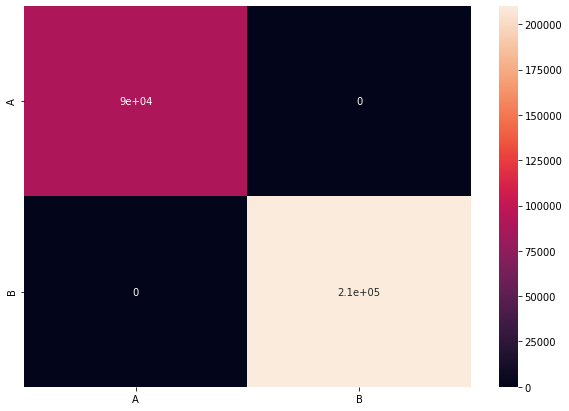

<matplotlib.axes._subplots.AxesSubplot at 0x7fc4642b3950>

In [0]:
import matplotlib.pyplot as plt
import seaborn as sn

#Creating a confusion matrix
df_cm = pd.DataFrame(array, index = [i for i in "AB"],
                  columns = [i for i in "AB"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
